## Lab #5 Assignment
## QMSS S5019 - Data Analysis with Python
## Lovina Putri
## CUID: lap2236

***(1) Set-up packages and code***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

***(2) Import data***

In [ ]:
url = 'https://www.qogdata.pol.gu.se/data/qog_bas_cs_jan25.xlsx'
df = pd.read_excel(url)

***(3) Data check***

In [ ]:
df.head()

,cname_qog,cname,ccode_qog,ccodecow,ccodealp,ccode,ajr_settmort,atop_ally,atop_number,bci_bci,...,wvs_imprel,wvs_pmi12,wvs_psarmy,wvs_psdem,wvs_psexp,wvs_pssl,wvs_relacc,wvs_satfin,wvs_subh,wvs_trust
0,Afghanistan,Afghanistan,4,700.0,AFG,4.0,4.540098,1.0,1.0,70.507206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Albania,8,339.0,ALB,8.0,NaN,1.0,8.0,56.955081,...,2.869328,NaN,1.596485,3.849031,3.475513,1.744196,NaN,NaN,3.488758,0.027857
2,Algeria,Algeria,12,615.0,DZA,12.0,4.359270,1.0,9.0,49.363506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,Andorra,20,232.0,AND,20.0,NaN,1.0,2.0,14.475297,...,2.034930,2.710394,1.336049,3.681363,2.635721,1.830491,1.751004,6.561316,4.089641,0.255744
4,Angola,Angola,24,540.0,AGO,24.0,5.634789,1.0,8.0,62.067964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***(4) Import packages for ML***

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

***(5) Questions***

**1 --  Create training and testing datasets.**  

Using a linear regression model, we plan to predict the level of Global Competitiveness Index (wef_gci) based on a set of economics and political variables:
1. Innovation capability (wef_ci)
2. FDI net inflows (wdi_fdiin)
3. Property Rights Index (wef_pr)
4. Government effectiveness (wbi_gee)
5. Human Development Index (undp_hdi)
6. Tax revenue (wdi_taxrev)
7. Economic Freedom of the World Index (current) (fi_index)

In [ ]:
# Standardize the variables
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit and transform the column (must be 2D)
scaled_scores = scaler.fit_transform(df[['math_score']])

# Add back to the DataFrame
df['math_scaled'] = scaled_scores

In [ ]:
df["undp_hdi_norm"] = df["undp_hdi"] * 100 #Normalize HDI to 0-100

df_cleaned = df.dropna(subset=['wef_gci', 'wdi_fdiin', 'wef_pr', 'wbgi_gee', 'wdi_taxrev', 'wef_ci', 'fi_index', 'undp_hdi_norm'])
X = df_cleaned[['wdi_fdiin', 'wef_pr',  'wdi_taxrev', 'wef_ci', 'undp_hdi_norm', 'fi_index', 'wbgi_gee']]
y = df_cleaned['wef_gci']

**2 -- Run an OLS regression on the data.  Get the mean-squared-error on your testing data.**  

We will make the training and testing datasets, where we will hold out 30% randomly of the total sample to test on.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred = ols_model.predict(X_test)

print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 2.178651479581048


In [ ]:
# Calculate and print the R-squared value
from sklearn.metrics import mean_squared_error, r2_score
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

R-squared: 0.951081771306006


 The model achieved a Mean Squared Error (MSE) of 2.1786, which can be interpreted as on average, the squared difference between this model's predictions on Global Competitiveness Index value and the actual values is 2.1786. Without anything to compare this MSE to, we really do not know if it is small or big.  This suggests that the model is able to capture some of the underlying relationships between these variables and Global Competitiveness Index.

**3 -- Also get the coefficients from the model.  Interpret some of them.**

In [ ]:
coefficients = pd.Series(ols_model.coef_, index=X.columns)
coefficients

,0
wdi_fdiin,-0.033303
wef_pr,0.933280
wdi_taxrev,-0.057384
wef_ci,0.284972
undp_hdi_norm,0.318295
fi_index,1.602259
wbgi_gee,1.253443


* **FDI net inflows (wdi_fdiin):** A one percentage point (in terms of % of GDP) increase in foreign direct investment (net inflows) is associated with a slight decrease in GCI of -0.033303.
* **Property Rights Index (wef_pr):** A one unit increase in property rights index is associated with an increase in GCI of 0.933280. This suggests that higher levels of property rights index are associated with higher levels of global competitiveness index.
* **Tax revenue (wdi_taxrev):** A one percentage point (in terms of % of GDP) increase in tax revenue is associated with a slight decrease in GCI of -0.057384.
* **Innovation capability (wef_ci):** A one unit increase in innovation capability index is associated with an increase in GCI of 0.284972.
* **Human Development Index (undp_hdi):** A one unit increase in HDI is associated with an increase in GCI of 0.318295.
* **Economic Freedom of the World Index (fi_index):** A one unit increase in economic freedom index is associated with an increase in GCI of 1.602259.
* **Government effectiveness (wbgi_gee):** A one unit increase in government effectiveness is associated with an increase in GCI of 1.253443.



**4 -- Prepare to run a random forest model over the same data.  Select the best parameters using grid-search.**  

I will perform hyperparameter tuning for a Random Forest Regressor model using GridSearchCV to find the optimal combination of parameters (n_estimators, max_depth, min_samples_split) that yields the best model performance (highest score).

In [ ]:
rf1 = RandomForestRegressor()

n_estimators = [50, 100, 300]
max_depth = [None, 1, 5]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf1, hyperF, cv = 3, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print("Best Parameters: %f using %s" % (bestF.best_score_, bestF.best_params_))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: 0.956359 using {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


**5 -- Run the best model and get the mean-squared-error on your testing data. Compare that mean-squared-error to the OLS one.  How similar/different are they?**

In [ ]:
rf_best = RandomForestRegressor(max_depth= 5, min_samples_split= 5, n_estimators= 50, min_samples_leaf=1)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 2.9400424290953806


Mean Squared Error from OLS: 2.1786

Mean Squared Error from ramdomforestregessor: 2.94

This implies that the random forest model performed worse at predicting accurately than did the the OLS model.  

In [ ]:
# Calculate and print the R-squared value using the model's score method
r_squared = rf_best.score(X_test, y_test)
print('R-squared:', r_squared)

R-squared: 0.910915448850483


**6 -- Get feature importances and interpret them.**  

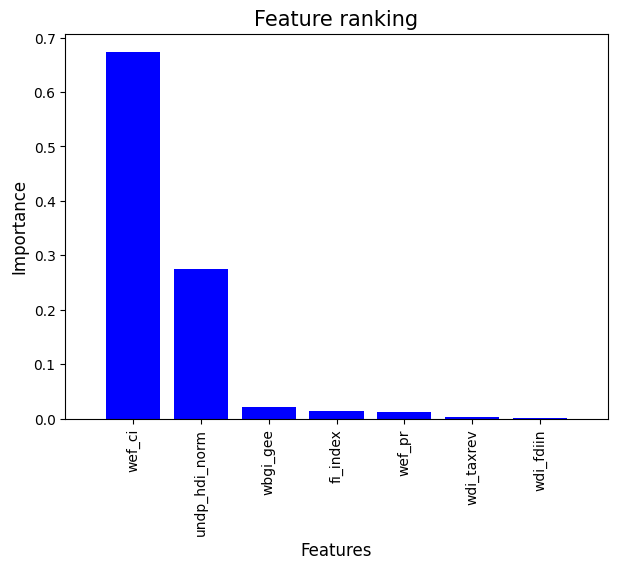

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# For rf_best as our trained Random Forest model
importance = rf_best.feature_importances_
indices = np.argsort(importance)[::-1]
feature_names = X.columns

f, ax = plt.subplots(figsize=(7, 5))
plt.title("Feature ranking", fontsize=15)
plt.bar(range(X.shape[1]), importance[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)  # Use indices to sort feature names
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.show()

Plot ranks the features by their importance showing Innovation Capability (wef_ci) is the most importance among other predictors, while Human Development Index (undp_hdi_norm) is the second most important. That is, for what it is worth, when Innovation Capability is not present in the prediction function, the model is much less accurate.

View it as a table:

In [ ]:
feature_importances = rf_best.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)

         Feature  Importance
3         wef_ci    0.673434
4  undp_hdi_norm    0.274192
6       wbgi_gee    0.022233
5       fi_index    0.014543
1         wef_pr    0.012286
2     wdi_taxrev    0.002264
0      wdi_fdiin    0.001049


---